In [3]:
import json
import math
import csv

# with open('dataset1022.json' , 'r') as reader:
#     jf = json.loads(reader.read())
# num_data = len(jf)

# with open('segment1209_keywords.json' , 'r') as reader:
#     Seg = json.loads(reader.read())
# num_seg = len(Seg)

# with open('segment1209_stopwords.json' , 'r') as reader:
#     Seg_stop = json.loads(reader.read())
# num_seg_stop = len(Seg)

with open('four_type1215.json' , 'r') as reader:
    art_type4 = json.loads(reader.read())  # art_type['id']=0/1/2/3

with open('twelve_type1215.json' , 'r') as reader:
    art_type12 = json.loads(reader.read())  # art_type['id']=0/1/2/3

emotion = {}
with open('cvaw4.csv', newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    for row in rows:
        emotion[row['Word']] = (row['Arousal_Mean'])

print (num_data)
print(num_seg)
print (num_seg_stop)

20937
20937
20937


In [24]:
import json
import math
import csv

with open('dataset0730.json' , 'r') as reader:
    jf = json.loads(reader.read())
num_data = len(jf)

with open('segment0730_keywords.json' , 'r') as reader:
    Seg = json.loads(reader.read())
num_seg = len(Seg)

with open('segment0730_stopwords.json' , 'r') as reader:
    Seg_stop = json.loads(reader.read())
num_seg_stop = len(Seg)

with open('four_type0225.json' , 'r') as reader:
    art_type4 = json.loads(reader.read())  # art_type['id']=0/1/2/3
    
with open('crush0228_4.json' , 'r') as reader:
    crush = json.loads(reader.read())
    
emotion_a = {}
emotion_v = {}
with open('cvaw4.csv', newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    for row in rows:
        emotion_a[row['Word']] = (row['Arousal_Mean'])
        emotion_v[row['Word']] = (row['Valence_Mean'])
        
print (num_data)
print(num_seg)
print (num_seg_stop)

20963
20963
20963


In [48]:
# ÊâæÂá∫ÂèØËæ®Ë≠òÊòüË±°ÁöÑÊñáÁ´†„ÄÅ‰∏îÈï∑Â∫¶Ë∂≥Â§†(>20ÂÄãË©û)ÁöÑÊñáÁ´† ,Âá∫‰æÜÊòØ a list of id
temp = list(set(art_type4.keys()) & set(Seg))
useable = []
usb_4 = [0,0,0,0]
# usb_12 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in temp:
    useable.append(i)
    usb_4[art_type4[i]]+=1
print ('useable: ', len(useable))
print (usb_4)

useable:  7477
[1832, 1758, 2091, 1796]


tf: Ë©≤Ë©ûÂú®Ê™îÊ°à‰∏≠ÁöÑÂá∫ÁèæÊ¨°Êï∏/ÊâÄÊúâÂ≠óË©ûÁöÑÂá∫ÁèæÊ¨°Êï∏‰πãÂíå„ÄÇ<br>
idf: Á∏ΩÊ™îÊ°àÊï∏ÁõÆÈô§‰ª•ÂåÖÂê´Ë©≤Ë©ûË™û‰πãÊ™îÊ°àÁöÑÊï∏ÁõÆÔºåÂÜçÂ∞áÂæóÂà∞ÁöÑÂïÜÂèñ‰ª•10ÁÇ∫Â∫ïÁöÑÂ∞çÊï∏ÂæóÂà∞

# ÊÄßÂà•

In [26]:
def Gender():
    vec_gen = {}
    male = 0
    m = [0,0,0,0]
    f = [0,0,0,0]
    for ID in jf:
        # ID = str(jf['id'])
        if ID in useable:
            if jf[ID]['gender']=='F':
                vec_gen[ID] = 1
                f[ art_type4[ID] ] += 1
            elif jf[ID]['gender']=='M':
                vec_gen[ID] = -1
                m[ art_type4[ID] ] += 1
                male += 1
            else:
                vec_gen[ID] = 0
    female = len(useable)-male
    print ('all:{}'.format(len(useable)),'male:{}'.format(male),'female:{}'.format(female))
    print ('m:', m)
    print ('f:', f)
    return vec_gen

vec_gender = Gender()

all:7477 male:1905 female:5572
m: [484, 414, 583, 424]
f: [1348, 1344, 1508, 1372]


# ÁôºÊñáÊôÇÈñìÂêëÈáè

In [28]:
from datetime import date
import re
import pandas as pd

def activeTime(item): # (owl, busy, free)=(0,1,2)
    vec_time = {}
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            output = re.findall(r'(\d*)-(\d*)-(\d*)T(\d*):(\d*):(\d*)', jf[ID][item])
            # print (output[0])
            time = output[0]
            hour = int(time[3])
            # night owl
            if (hour>=1 and hour<7): 
                vec_time[ID] = 0  
            else:
                wkd = date(int(time[0]), int(time[1]), int(time[2])).weekday()
                # busy
                if (wkd>=1 and wkd<=5) and ((hour>=9 and hour<12) or (hour>=14 and hour<17)):
                    vec_time[ID] = 1                  
                # free
                else: 
                    vec_time[ID] = 2
    return vec_time


# after onehot-encoding, there are 6 dimensions
def encodeTime():
    vec_createTime = activeTime("createdAt")
    vec_updateTime = activeTime("updatedAt")
    vec_time = {}
    
    for ID in useable:
        ohe = [0,0,0,0,0,0]
        ohe[ vec_createTime[ID] ]+=1
        ohe[ vec_updateTime[ID]+3 ]+=1    
        vec_time[ID] = ohe
    return vec_time

vec_time = encodeTime()

# ÊñáÁ´†Â≠óÊï∏ÂêëÈáè

In [29]:
def countArtLen(): # count an article's length
    vec_artlen = {}
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            content = jf[ID]['content']
            vec_artlen[ID] = len(content)
    return vec_artlen

vec_artlen = countArtLen()

# Âè•Â≠êÂπ≥ÂùáÈï∑Â∫¶ÂêëÈáè

In [30]:
import re
def countSenLen():
    vec_sentence_len = {}
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            content = jf[ID]['content']
            holder = re.split(',|\?| |\(|\)|\.|!|Ôºå|„ÄÇ|„ÄÅ|\n|Ôºö|Ôºõ|Ôºü|‚Ä¶|‚ãØ|Ôºà|Ôºâ|ÔºÅ|ÔΩû',content)
            num_sen = 0
            total = 0
            for one_sen in holder:
                if len(one_sen)>0:
                    num_sen += 1
                    total += len(one_sen)
            vec_sentence_len[ID] = total/num_sen   

    return vec_sentence_len

vec_senlen = countSenLen()

# ÊÑüÂòÜË©û

In [31]:
def countSigh(): # count sigh words number
    # ask, shock, sad, jolly
    sigh = [['Âóé', 'Âë¢', 'Âí¶', 'Ëõ§'], ['Âïä', 'Âñî', 'Âì¶', 'Âêß', 'Âê∂', 'Âë¶', 'Âï¶', 'Âõâ'], ['Âóö', 'Âìé', 'Âô¢', 'Âîâ', 'ÂëÄ'], ['Âòø', 'Âìà', 'Âëµ', 'Âòª']]
    # sigh = ['Âìà','Âëµ','Âòª','Âë¢','Âóé','Âí¶','Âñî','Âë¶','ÂóØ','Âïä','ÂëÄ','Âê∂','Âô¢','Âóö','Âìé','Âìá','Ëõ§']
    vec_sigh = {}
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            num_sigh = [0, 0, 0, 0]
            # num_sigh = 0
            for s in range(len(sigh)):
                for w in sigh[s]:
                    num_sigh[s] += jf[ID]['content'].count(w)
                num_sigh[s] = num_sigh[s]/len(jf[ID]['content'])            
            vec_sigh[ID] = num_sigh 

    return vec_sigh

vec_sigh = countSigh()

# Ë°®ÊÉÖÁ¨¶Ëôü

In [32]:
from emoji import UNICODE_EMOJI

def emojis(s):
    count = 0
    for emoji in UNICODE_EMOJI:
        count += s.count(emoji)
    return count

def countEmoji(): # count sigh words number
    vec_emoji = {}
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            content = jf[ID]['content']
            vec_emoji[ID] = emojis(content)/len(content)
    return vec_emoji

vec_emoji = countEmoji()

# Ê®ôÈªûÁ¨¶Ëôü

In [33]:
def Punctuation():
    vec_punc = {}
    puncs = [',','Ôºå',':','Ôºö','?','Ôºü','!','ÔºÅ','(','Ôºà']
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            content = jf[ID]['content']           
            puncArray = [0,0,0,0,0]
            for i in range(5):
                puncArray[i] += content.count(puncs[(i*2)])
                puncArray[i] += content.count(puncs[(i*2+1)])
            
            for i in range(5):
                puncArray[i] = puncArray[i]/len(content)                
            vec_punc[ID] = puncArray
    return vec_punc

vec_punc = Punctuation()

# ‰∫∫Á®±

In [34]:
def PersonalPronoun(): # ÊàëÂÄë„ÄÅÊàë„ÄÅ‰Ω†Â¶≥„ÄÅ‰ªñÂ•π
    vec_pp = {}
    # for a in range(num_data):
    for ID in jf:
        # ID = str(jf[a]['id'])
        if ID in useable:
            content = jf[ID]['content']
            holder = re.split(',|\?| |\(|\)|\.|!|Ôºå|„ÄÇ|„ÄÅ|\n|Ôºö|Ôºõ|Ôºü|‚Ä¶|‚ãØ|Ôºà|Ôºâ|ÔºÅ|ÔΩû',content)
            
            ppArray = [0,0,0,0]
            for one_sen in holder:
                if len(one_sen)>=2:
                    if one_sen[0]=='Êàë':
                        if one_sen[1]=='ÂÄë':
                            ppArray[0]+=1
                        else:
                            ppArray[1]+=1
                    elif one_sen[0]=='‰Ω†' or one_sen[0]=='Â¶≥':
                        ppArray[2]+=1
                    elif one_sen[0]=='‰ªñ' or one_sen[0]=='Â•π':
                        ppArray[3]+=1
            for i in range(4):
                ppArray[i] = ppArray[i]/len(content)
            vec_pp[ID] = ppArray   

    return vec_pp

vec_pp = PersonalPronoun()

# ÊÉÖÁ∑íË©û

In [35]:
level_1=0
level_2=0
level_3=0
for w in emotion_a:
    emotion_v[w] = float(emotion_v[w])
    if emotion_v[w]<4.0:
        level_1+=1
    elif emotion_v[w]<6.0:
        level_2+=1
    else:
        level_3+=1
print ('level_1:',level_1, '|level_2:',level_2, '|level_3:',level_3)

level_1: 2554 |level_2: 1474 |level_3: 1484


In [36]:
import math
def FindEmotionWords():
    vec_emotion={}
    for ID in useable:
        valance = [0,0,0]     #[bad, peace, happy]
        emo_count = 0
        for w in Seg[ID]:
            if w in emotion_v.keys():
                emo_count += 1
                v = float(emotion_v[w])
                a = float(emotion_a[w])
                if v<4.0:
                    valance[0] += (4-v)*math.log(a, 1.5)
                elif v<6.0:
                    valance[1] += 1.5*math.log(a, 1.5)
                else:
                    valance[2] += (v-6)*math.log(a, 1.5)
        if emo_count!=0:
            for i in range(3):
                valance[i] /= emo_count
                valance[i] = round(valance[i], 3)
        vec_emotion[ID] = valance
    return vec_emotion
                
vec_emotion = FindEmotionWords()

In [242]:
for ID in useable:
    if vec_artlen[ID]>150 and vec_artlen[ID]<300 and vec_emotion[ID][2]>2 and ('ÊúâÂ§†' in jf[ID]['content']):
        print (ID)
        EMO = vec_emotion[ID]
        print ('negative= {}, peace= {}, positive= {}'.format(EMO[0], EMO[1], EMO[2]))
        print ('-----')
        print (jf[ID]['content'])
        print ()

232001492
negative= 1.672, peace= 1.323, positive= 2.168
-----
ÊúâÊ≤íÊúâÈáëÁâõÂ•≥ÊàêÂäüÊî∂ÊúçÊ∞¥Áì∂Áî∑ÁöÑü•∫

Ë∑üÊ∞¥Áì∂ÊÉ≥ËôïÁúüÁöÑÊúâÂ§†ÁóõËã¶üò≠üò≠üò≠
ÊàëËá™Â∑±‰πüÂæàÂÇ≤Ôºå‰ΩÜÂÇ≤Âà∞ÊúÄÂæåÂèó‰∏ç‰∫ÜÈÇÑÊòØËá™Â∑±ÂéªÂØÜ‰∫Ü‰ªñÔºà‰πãÂâçË¢´Â∑≤ËÆÄÔºâ
ÂÜç‰πãÂâçÂæàÊõñÊòßÈÉΩÊúÉ‰∏ªÂãïÂ†±ÂÇô
‰πãÂæåÈÉΩÊòØÊôÇÂ•ΩÊôÇ‰∏çÂ•Ω ÂΩºÊ≠§ÂÅ∂ÁàæÂàÜ‰∫´Ëá™Â∑±Âú®ÂππÂòõËÄåÂ∑≤
‰ΩÜÊúâÊôÇÂÄôÂàÜ‰∫´‰∫ÜÂèàÊ≤íÊúâÂÄãÂõûÊáâ
ÊàëÂÄë‰πüÂæà‰πÖÊ≤íÊúâÂ•ΩÂ•Ω‰Ω†‰∏ÄÂè•Êàë‰∏ÄÂè•ËÅäÂ§©‰∫Ü
ÈõñÁÑ∂‰ªñË™™ÂæàÂøôÔºåÊàë‰πüÊúâË¶ÅÂøôÁöÑ‰∫ã‰ΩÜÊàëÂ∞±ÊúÉÊéõÈÄô‰∏ÄÈ°ÜÂøÉÂú®‰ªñÈÇ£Ôºå‰ΩÜ‰ªñÂ•ΩÂÉè‰πüÊ≤íÊúâÁõ∏Â∞çÁöÑÈÄôÊ®£Â∞çÊàë
Êàë‰πü‰∏çÊï¢Ë∑ü‰ªñË¨õÂ§™Â§öÊêû‰∏çÂ•ΩÊàëË™§Ëß£ÊÑèÊÄù
‰ΩÜ‰πãÂâçÈÉΩÊúÉÂ†±ÂÇôÁöÑÊÑèÊÄùÊòØ‰ªÄÈ∫º..

230913334
negative= 0.0, peace= 1.819, positive= 2.239
-----
ÂéüÊú¨ÊÉ≥Ë™™ÔΩû‰ªäÂπ¥19Âú®Âπ≥Êó•
Â§ßÊ¶Ç‰∏çÊúÉÊúâ‰∫∫Ë®òÂæóÂêßüò≠

Ê≤íÊÉ≥Âà∞Ë†çË†çÂ≠∏Èï∑Âú®ÁîüÊó•ÂÄíÊï∏ÂâçÂçÅÂàÜÈêò
ÊääÁ¶ÆÁâ©ÈÄÅ‰æÜÊàëÂÆ∂
ÊÑüÂãïÊÑüÂãïü•∞ü•∞

ÊúÄËøëÁúãÂà∞ÂæàÂ§öÈ≠öÂ•≥Ë†çÁî∑ÁöÑÁµÑÂêà
ÁúüÁöÑÔºÅ‰ªñÂÄëÊúâÂ§†Ëôê‰∫∫ÁöÑÔºàÂ§ßÁôΩÁõÆ
ÈÄÅÁ¶ÆÁâ©ÂâçÈÇÑÊääÊàëÊÉπÁîüÊ∞£

In [235]:
# tempid = 4
# EMO = vec_emotion[useable[tempid]]
ID = '230707591'
EMO = vec_emotion[ID]
print ('negative= {}, peace= {}, positive= {}'.format(EMO[0], EMO[1], EMO[2]))
print ('-----')
print (jf[ID]['content'])

negative= 0.397, peace= 0.0, positive= 2.574
-----
ÈõñÁÑ∂ÂæàÂ§ö‰∫∫ÈÉΩË™™ÈáëÁâõ‰∏çÂêÉÂõûÈ†≠Ëçâ
‰ΩÜÊòØÊàëÈÇÑÊòØÊÉ≥Ë¶ÅÊåΩÂõû‰ªñÔºÅ
Ë´ãÂ§ßÂÆ∂Â§öÂ§öÊåáÊïô‰∏Ä‰∏ãÔºÅ

ÊàëÂÄëÊòØÂõ†Áà≤Áí∞Â¢ÉÂõ†Á¥†ËÄåÂ∞éËá¥ÂàÜÈñã
‰∏çÊòØ‰∏çÊÑõ‰∫Ü
ÂíåÂπ≥ÂàÜÈñã

ÂàÜ‰∫Ü‰∏âÂÄãÊúà‰∫Ü Ê≤íÊÄéÈ∫ºËÅØÁµ°


In [70]:
def FindEmotionWords_arousal():
    # Dict_collector_emotion = []
    vec_emotion={}
    for ID in useable:
        emo_count=0
        level = [0,0,0]     #[ease, normal, excited]
        for w in Seg[ID]:
            if w in emotion_a.keys():
                if float(emotion_a[w])<4:
                    level[0] += 1
                elif float(emotion_a[w])<6:
                    level[1] += 1
                else:
                    level[2] += 1
                emo_count += 1
        if emo_count != 0 :
            level[0] /= emo_count
            level[1] /= emo_count
            level[2] /= emo_count

        vec_emotion[ID]=level
    return vec_emotion
                
vec_emotion_arousal = FindEmotionWords_arousal()

# tagÊï∏

In [37]:
def TagNum():
    vec_tag = {}
    for ID in useable:
        vec_tag[ID] = len(jf[ID]['topics'])        
    return vec_tag

vec_tagNum = TagNum()

# ÂåøÂêçÊÄß

In [38]:
def Anonymous():
    vec_ano = {}
    for ID in useable:
        vec_ano[ID] = [int(jf[ID]['anonymousSchool']),int(jf[ID]['anonymousDepartment']),int(jf[ID]['withNickname'])]
    return vec_ano

vec_anonymous = Anonymous()

In [266]:
vec_anonymous[useable[1]]

[0, 1, 0]

# tagÂà∞ÁöÑ‰∫∫

In [39]:
def Crush():
    vec_cr = {}
    for ID in useable:
        dish = [0,0,0,0]
        if ID in crush:
            dish[crush[ID]]+=1
        vec_cr[ID] = dish
    return vec_cr

vec_crush = Crush()

# Ë©ûÊÄßÁµ±Ë®à

# Âêà‰ΩµÂêëÈáè

In [ ]:
## ÈóúÈçµË©û„ÄÅÂÅúÁî®Ë©û„ÄÅÊôÇÈñì1„ÄÅÊôÇÈñì2„ÄÅÊÑüÂòÜ„ÄÅÊñáÈï∑„ÄÅÂè•Èï∑„ÄÅË°®ÊÉÖÊï∏„ÄÅÊÉÖÁ∑íË©û„ÄÅ‰∫∫Á®±„ÄÅÊ®ôÈªû

In [258]:
with open('keywords_CKIP_1200.json' , 'r') as reader:
    Key = json.loads(reader.read())
num_k = len(Key)
with open('stopwords_CKIP_200.json' , 'r') as reader:
    Stop = json.loads(reader.read())
num_s = len(Stop)

def BagOfWords(ID):
    for ele in Key[ID]:
        one_vec.append(ele)
    for ele in Stop[ID]:
        one_vec.append(ele)
    return one_vec

# type(k500[useable[0]]) --> list
len(Key[useable[0]])

In [60]:
with open('w2v_key_800.json' , 'r') as reader:
    w2v_key = json.loads(reader.read())
    
with open('w2v_stop_100.json' , 'r') as reader:
    w2v_stop = json.loads(reader.read())    
    
print (len(w2v_key[useable[0]]), len(w2v_stop[useable[0]]))

800 100


In [71]:
# after dimension reduction

def put_features_in_vec(article, stop): 
    V = {}
    for ID in useable:
        if ID not in w2v_key:
            print (ID)
            continue
        # one_vec = bow(ID)  # articles as bag-of-words
        one_vec = article[ID] + [vec_artlen[ID], vec_senlen[ID], vec_emoji[ID], vec_tagNum[ID]]
        one_vec = one_vec + vec_time[ID] + vec_sigh[ID] + vec_emotion[ID] + vec_emotion_arousal[ID] +\
                    vec_pp[ID] + vec_punc[ID] + vec_anonymous[ID] + vec_crush[ID]
        V[ID] = [ID, art_type4[ID]] + one_vec
        
    return V

Vector = put_features_in_vec(w2v_key, w2v_stop)

229969163
231756534


In [73]:
i = useable[0]
print ("Vector lengh:", len(Vector))
print ("Vector features lengh:", len(Vector[i]))
print("w2v_key lengh:", len(w2v_key[i]))
print("w2v_stop lengh:", len(w2v_stop[i]))
print ('4 features with 1 dim')
print(len(vec_time[i]))
print(len(vec_sigh[i]))
print(len(vec_emotion[i]))
print(len(vec_emotion_arousal[i]))
print(len(vec_pp[i]))
print(len(vec_punc[i]))
print(len(vec_anonymous[i]))
print(len(vec_crush[i]))

Vector lengh: 7475
Vector features lengh: 838
w2v_key lengh: 800
w2v_stop lengh: 100
4 features with 1 dim
6
4
3
3
4
5
3
4


## create column list

In [74]:
# def ColumnName(num_key, num_stop):
def ColumnName(article, stop):

    csv_columns = ['ID', 'label']

    for i in range( len(article[useable[0]]) ):
        csv_columns.append('w2v_key_{}'.format(i))
#     for i in range( len(stop[useable[0]]) ):
#         csv_columns.append('w2v_stop_{}'.format(i))        
                
    csv_columns = csv_columns + ['artlen', 'senlen', 'emoji', 'num_tags']
    csv_columns = csv_columns + ['creatT_1', 'creatT_2', 'creatT_3', 'updateT_1', 'updateT_2', 'updateT_3']
    csv_columns = csv_columns + ['sigh_ask', 'sigh_sigh', 'sigh_sad', 'sigh_jolly']
    csv_columns = csv_columns + ['emo_sad', 'emo_peace', 'emo_happy']
    csv_columns = csv_columns + ['emo_low', 'emo_mid', 'emo_high']
    csv_columns = csv_columns + ['we', 'me', 'you', 'him']
    csv_columns = csv_columns + ['comma', 'colon', 'question', 'exclaim', 'bracket']
    csv_columns = csv_columns + ['ano_1', 'ano_2', 'ano_3']
    csv_columns = csv_columns + ['crush_1', 'crush_2', 'crush_3', 'crush_4']
    
    print(len(csv_columns))
    return csv_columns

Cname = ColumnName(w2v_key, w2v_stop)

838


In [75]:
final_Vec_M = []
final_Vec_F = []
for k,v in Vector.items():
    if jf[k]['gender'] == 'M':
        final_Vec_M.append(v)
    else:
        final_Vec_F.append(v)

In [76]:
df = pd.DataFrame(final_Vec_M, columns = Cname) 
df.to_csv('ReadyM_w2v_0731.csv', index=False)


df = pd.DataFrame(final_Vec_F, columns = Cname) 
df.to_csv('ReadyF_w2v_0731.csv', index=False)

In [358]:
len(final_Vec_F[0])

535

In [34]:
from tqdm import tqdm


final_list = []
for k, v in tqdm(Vector.items()):
    print(k)
    # print(v)
    final_list.append([k] + v)
    print (final_list)
    #break

  0%|          | 15/7498 [00:00<00:50, 149.15it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 28/7498 [00:00<01:39, 75.40it/s] IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  1%|          | 38/7498 [00:00<02:39, 46.68it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_

  2%|‚ñè         | 134/7498 [00:07<12:53,  9.52it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  2%|‚ñè         | 136/7498 [00:07<15:04,  8.14it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  2%|‚ñè         | 139/7498 [00:08<14:29,  8.46it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  2%|‚ñè         | 186/7498 [00:14<16:59,  7.17it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  3%|‚ñé         | 189/7498 [00:14<17:13,  7.07it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  3%|‚ñé         | 192/7498 [00:15<17:36,  6.91it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  3%|‚ñé         | 236/7498 [00:23<23:03,  5.25it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  3%|‚ñé         | 239/7498 [00:23<22:10,  5.46it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  3%|‚ñé         | 242/7498 [00:24<22:37,  5.35it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  4%|‚ñç         | 288/7498 [00:35<29:43,  4.04it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  4%|‚ñç         | 289/7498 [00:35<31:22,  3.83it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  4%|‚ñç         | 291/7498 [00:35<30:10,  3.98it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  4%|‚ñç         | 319/7498 [00:43<34:27,  3.47it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  4%|‚ñç         | 320/7498 [00:43<33:34,  3.56it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  4%|‚ñç         | 321/7498 [00:43<33:35,  3.56it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  5%|‚ñç         | 351/7498 [00:52<34:45,  3.43it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  5%|‚ñç         | 352/7498 [00:52<35:36,  3.35it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  5%|‚ñç         | 353/7498 [00:52<35:17,  3.37it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  5%|‚ñå         | 380/7498 [01:00<35:30,  3.34it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  5%|‚ñå         | 381/7498 [01:01<33:57,  3.49it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  5%|‚ñå         | 382/7498 [01:01<38:39,  3.07it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp


232464865


  5%|‚ñå         | 408/7498 [01:10<40:42,  2.90it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  5%|‚ñå         | 409/7498 [01:10<39:32,  2.99it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  5%|‚ñå         | 410/7498 [01:10<39:23,  3.00it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  6%|‚ñå         | 434/7498 [01:19<43:11,  2.73it/s]


232612940


  6%|‚ñå         | 435/7498 [01:19<41:52,  2.81it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  6%|‚ñå         | 436/7498 [01:19<40:50,  2.88it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  6%|‚ñå         | 437/7498 [01:20<41:11,  2.86it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp


230754446


  6%|‚ñå         | 444/7498 [01:22<42:28,  2.77it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  6%|‚ñå         | 446/7498 [01:23<39:56,  2.94it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  6%|‚ñå         | 447/7498 [01:23<38:25,  3.06it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  6%|‚ñã         | 476/7498 [01:34<45:19,  2.58it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  6%|‚ñã         | 477/7498 [01:35<45:11,  2.59it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  6%|‚ñã         | 479/7498 [01:35<43:20,  2.70it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  7%|‚ñã         | 504/7498 [01:45<48:02,  2.43it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  7%|‚ñã         | 506/7498 [01:46<46:43,  2.49it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  7%|‚ñã         | 507/7498 [01:47<47:58,  2.43it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  7%|‚ñã         | 533/7498 [01:58<49:34,  2.34it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  7%|‚ñã         | 535/7498 [01:58<48:16,  2.40it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  7%|‚ñã         | 536/7498 [01:59<49:40,  2.34it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  7%|‚ñã         | 562/7498 [02:10<53:44,  2.15it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 564/7498 [02:11<50:00,  2.31it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 565/7498 [02:12<51:36,  2.24it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  8%|‚ñä         | 590/7498 [02:23<55:22,  2.08it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 592/7498 [02:24<52:48,  2.18it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 593/7498 [02:25<54:37,  2.11it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp

  8%|‚ñä         | 620/7498 [02:38<57:25,  2.00it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 621/7498 [02:39<59:15,  1.93it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 622/7498 [02:39<55:46,  2.05it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp


231655546


  8%|‚ñä         | 634/7498 [02:46<1:05:05,  1.76it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 636/7498 [02:47<59:09,  1.93it/s]  IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  8%|‚ñä         | 637/7498 [02:47<1:00:29,  1.89it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

  9%|‚ñâ         | 664/7498 [03:01<57:56,  1.97it/s]  IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  9%|‚ñâ         | 665/7498 [03:02<1:03:06,  1.80it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  9%|‚ñâ         | 667/7498 [03:03<1:02:55,  1.81it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

  9%|‚ñâ         | 695/7498 [03:19<1:05:35,  1.73it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  9%|‚ñâ         | 696/7498 [03:20<1:04:16,  1.76it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  9%|‚ñâ         | 698/7498 [03:21<1:01:38,  1.84it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

 10%|‚ñâ         | 725/7498 [03:36<1:06:01,  1.71it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 10%|‚ñâ         | 727/7498 [03:38<1:08:01,  1.66it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 10%|‚ñâ         | 728/7498 [03:38<1:10:14,  1.61it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

 10%|‚ñà         | 755/7498 [03:55<1:11:14,  1.58it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 10%|‚ñà         | 756/7498 [03:56<1:07:54,  1.65it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 10%|‚ñà         | 758/7498 [03:57<1:07:36,  1.66it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

 11%|‚ñà         | 788/7498 [04:16<1:07:43,  1.65it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|‚ñà         | 789/7498 [04:17<1:16:10,  1.47it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|‚ñà         | 791/7498 [04:18<1:11:55,  1.55it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb


231374896


 11%|‚ñà         | 804/7498 [04:27<1:15:22,  1.48it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|‚ñà         | 805/7498 [04:27<1:12:03,  1.55it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|‚ñà         | 807/7498 [04:29<1:15:39,  1.47it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

 11%|‚ñà         | 838/7498 [04:49<1:14:42,  1.49it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|‚ñà         | 840/7498 [04:50<1:15:03,  1.48it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 11%|‚ñà         | 841/7498 [04:51<1:16:11,  1.46it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteb

 12%|‚ñà‚ñè        | 869/7498 [05:11<1:20:37,  1.37it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 12%|‚ñà‚ñè        | 871/7498 [05:12<1:19:47,  1.38it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 12%|‚ñà‚ñè        | 872/7498 [05:13<1:20:05,  1.38it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`-

 12%|‚ñà‚ñè        | 901/7498 [05:34<1:20:35,  1.36it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 12%|‚ñà‚ñè        | 902/7498 [05:35<1:17:31,  1.42it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 12%|‚ñà‚ñè        | 904/7498 [05:36<1:18:14,  1.40it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`-


229805231


 12%|‚ñà‚ñè        | 907/7498 [05:38<1:19:18,  1.39it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 12%|‚ñà‚ñè        | 908/7498 [05:39<1:20:38,  1.36it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 12%|‚ñà‚ñè        | 909/7498 [05:40<1:19:05,  1.39it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`-

 13%|‚ñà‚ñé        | 938/7498 [06:02<1:23:35,  1.31it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 13%|‚ñà‚ñé        | 941/7498 [06:04<1:16:34,  1.43it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 13%|‚ñà‚ñé        | 943/7498 [06:06<1:24:18,  1.30it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`-

 13%|‚ñà‚ñé        | 975/7498 [06:31<1:25:50,  1.27it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 13%|‚ñà‚ñé        | 977/7498 [06:33<1:24:17,  1.29it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 13%|‚ñà‚ñé        | 979/7498 [06:34<1:23:25,  1.30it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`-

 13%|‚ñà‚ñé        | 1011/7498 [07:00<1:27:45,  1.23it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 13%|‚ñà‚ñé        | 1012/7498 [07:01<1:25:56,  1.26it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|‚ñà‚ñé        | 1013/7498 [07:02<1:29:42,  1.20it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 14%|‚ñà‚ñç        | 1041/7498 [07:25<1:37:11,  1.11it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|‚ñà‚ñç        | 1042/7498 [07:26<1:35:51,  1.12it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|‚ñà‚ñç        | 1043/7498 [07:26<1:34:09,  1.14it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable


231835353


 14%|‚ñà‚ñç        | 1055/7498 [07:36<1:28:31,  1.21it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|‚ñà‚ñç        | 1056/7498 [07:37<1:33:19,  1.15it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|‚ñà‚ñç        | 1057/7498 [07:38<1:32:59,  1.15it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 14%|‚ñà‚ñç        | 1085/7498 [08:02<1:36:07,  1.11it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|‚ñà‚ñç        | 1087/7498 [08:04<1:32:59,  1.15it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 15%|‚ñà‚ñç        | 1088/7498 [08:05<1:34:57,  1.12it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 15%|‚ñà‚ñç        | 1116/7498 [08:30<1:35:00,  1.12it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 15%|‚ñà‚ñç        | 1117/7498 [08:31<1:40:01,  1.06it/s]


231901750


 15%|‚ñà‚ñç        | 1119/7498 [08:33<1:31:19,  1.16it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 15%|‚ñà‚ñç        | 1120/7498 [08:33<1:33:44,  1.13it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 15%|‚ñà‚ñç        | 1121/7498 [08:34<1:36:16,  1.10it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 15%|‚ñà‚ñå        | 1151/7498 [09:02<1:35:56,  1.10it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 15%|‚ñà‚ñå        | 1152/7498 [09:03<1:37:46,  1.08it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 15%|‚ñà‚ñå        | 1154/7498 [09:04<1:35:32,  1.11it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 16%|‚ñà‚ñå        | 1181/7498 [09:30<1:41:48,  1.03it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 16%|‚ñà‚ñå        | 1182/7498 [09:30<1:35:52,  1.10it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 16%|‚ñà‚ñå        | 1183/7498 [09:31<1:36:44,  1.09it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 16%|‚ñà‚ñå        | 1213/7498 [10:00<1:40:11,  1.05it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 16%|‚ñà‚ñå        | 1214/7498 [10:01<1:40:34,  1.04it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 16%|‚ñà‚ñå        | 1216/7498 [10:03<1:40:24,  1.04it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 17%|‚ñà‚ñã        | 1248/7498 [10:35<1:46:50,  1.03s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1249/7498 [10:36<1:46:53,  1.03s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1250/7498 [10:37<1:47:40,  1.03s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable


230271955


 17%|‚ñà‚ñã        | 1261/7498 [10:48<1:51:21,  1.07s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1262/7498 [10:49<1:45:53,  1.02s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1263/7498 [10:50<1:49:44,  1.06s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable


229874538


 17%|‚ñà‚ñã        | 1291/7498 [11:19<1:45:24,  1.02s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1292/7498 [11:20<1:49:09,  1.06s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1293/7498 [11:22<1:56:27,  1.13s/it]


229571859


 17%|‚ñà‚ñã        | 1296/7498 [11:24<1:40:14,  1.03it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1297/7498 [11:25<1:37:15,  1.06it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 17%|‚ñà‚ñã        | 1299/7498 [11:28<1:51:11,  1.08s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 18%|‚ñà‚ñä        | 1325/7498 [11:55<1:48:48,  1.06s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 18%|‚ñà‚ñä        | 1326/7498 [11:56<1:49:13,  1.06s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 18%|‚ñà‚ñä        | 1329/7498 [11:59<1:42:14,  1.01it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 18%|‚ñà‚ñä        | 1359/7498 [12:32<1:45:59,  1.04s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 18%|‚ñà‚ñä        | 1361/7498 [12:34<1:53:03,  1.11s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 18%|‚ñà‚ñä        | 1362/7498 [12:36<1:55:57,  1.13s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable


230883359


 18%|‚ñà‚ñä        | 1386/7498 [13:02<1:49:11,  1.07s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 19%|‚ñà‚ñä        | 1388/7498 [13:05<1:51:55,  1.10s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 19%|‚ñà‚ñä        | 1390/7498 [13:07<1:53:45,  1.12s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 19%|‚ñà‚ñâ        | 1424/7498 [13:45<1:55:41,  1.14s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 19%|‚ñà‚ñâ        | 1425/7498 [13:46<1:51:01,  1.10s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 19%|‚ñà‚ñâ        | 1426/7498 [13:47<1:56:42,  1.15s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 19%|‚ñà‚ñâ        | 1456/7498 [14:21<1:54:52,  1.14s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 19%|‚ñà‚ñâ        | 1457/7498 [14:23<1:58:17,  1.17s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 19%|‚ñà‚ñâ        | 1459/7498 [14:25<1:55:35,  1.15s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 20%|‚ñà‚ñâ        | 1493/7498 [15:06<1:54:00,  1.14s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 20%|‚ñà‚ñâ        | 1495/7498 [15:08<1:56:05,  1.16s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 20%|‚ñà‚ñâ        | 1496/7498 [15:09<1:59:29,  1.19s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable


230969538


 20%|‚ñà‚ñà        | 1502/7498 [15:17<2:04:20,  1.24s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 20%|‚ñà‚ñà        | 1503/7498 [15:18<1:55:48,  1.16s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 20%|‚ñà‚ñà        | 1504/7498 [15:19<2:01:03,  1.21s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 20%|‚ñà‚ñà        | 1535/7498 [15:57<2:02:35,  1.23s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 20%|‚ñà‚ñà        | 1536/7498 [15:58<2:06:14,  1.27s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 21%|‚ñà‚ñà        | 1538/7498 [16:01<2:03:30,  1.24s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 21%|‚ñà‚ñà        | 1569/7498 [16:39<1:56:22,  1.18s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 21%|‚ñà‚ñà        | 1571/7498 [16:42<2:05:03,  1.27s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 21%|‚ñà‚ñà        | 1572/7498 [16:43<2:06:15,  1.28s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable

 21%|‚ñà‚ñà‚ñè       | 1600/7498 [17:18<2:04:34,  1.27s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 21%|‚ñà‚ñà‚ñè       | 1601/7498 [17:20<2:04:33,  1.27s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 21%|‚ñà‚ñà‚ñè       | 1603/7498 [17:22<2:05:41,  1.28s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 22%|‚ñà‚ñà‚ñè       | 1638/7498 [18:08<2:12:08,  1.35s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 22%|‚ñà‚ñà‚ñè       | 1639/7498 [18:09<2:13:24,  1.37s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 22%|‚ñà‚ñà‚ñè       | 1641/7498 [18:12<2:08:28,  1.32s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 22%|‚ñà‚ñà‚ñè       | 1674/7498 [18:56<2:06:16,  1.30s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 22%|‚ñà‚ñà‚ñè       | 1675/7498 [18:57<1:59:54,  1.24s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 22%|‚ñà‚ñà‚ñè       | 1676/7498 [18:58<2:10:19,  1.34s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230288085


 22%|‚ñà‚ñà‚ñè       | 1685/7498 [19:11<2:15:41,  1.40s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 22%|‚ñà‚ñà‚ñè       | 1687/7498 [19:13<2:06:48,  1.31s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1689/7498 [19:16<2:08:17,  1.33s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230783929


 23%|‚ñà‚ñà‚ñé       | 1702/7498 [19:34<2:20:29,  1.45s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1703/7498 [19:35<2:14:22,  1.39s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1704/7498 [19:37<2:13:27,  1.38s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 23%|‚ñà‚ñà‚ñé       | 1738/7498 [20:23<2:12:14,  1.38s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1739/7498 [20:24<2:10:02,  1.35s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1740/7498 [20:26<2:10:18,  1.36s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


229852798


 23%|‚ñà‚ñà‚ñé       | 1756/7498 [20:49<2:28:17,  1.55s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1757/7498 [20:50<2:28:35,  1.55s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 23%|‚ñà‚ñà‚ñé       | 1760/7498 [20:54<2:11:05,  1.37s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 24%|‚ñà‚ñà‚ñç       | 1794/7498 [21:44<2:23:14,  1.51s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 24%|‚ñà‚ñà‚ñç       | 1795/7498 [21:46<2:27:40,  1.55s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 24%|‚ñà‚ñà‚ñç       | 1797/7498 [21:49<2:26:24,  1.54s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 24%|‚ñà‚ñà‚ñç       | 1833/7498 [22:43<2:26:34,  1.55s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 24%|‚ñà‚ñà‚ñç       | 1835/7498 [22:46<2:25:08,  1.54s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 24%|‚ñà‚ñà‚ñç       | 1836/7498 [22:47<2:25:30,  1.54s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 25%|‚ñà‚ñà‚ñç       | 1870/7498 [23:39<2:27:10,  1.57s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 25%|‚ñà‚ñà‚ñç       | 1872/7498 [23:42<2:24:02,  1.54s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 25%|‚ñà‚ñà‚ñç       | 1873/7498 [23:44<2:27:40,  1.58s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230234903


 25%|‚ñà‚ñà‚ñå       | 1889/7498 [24:08<2:31:28,  1.62s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 25%|‚ñà‚ñà‚ñå       | 1891/7498 [24:11<2:21:42,  1.52s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 25%|‚ñà‚ñà‚ñå       | 1893/7498 [24:14<2:21:04,  1.51s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 26%|‚ñà‚ñà‚ñå       | 1925/7498 [25:04<2:22:35,  1.54s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 26%|‚ñà‚ñà‚ñå       | 1926/7498 [25:05<2:25:17,  1.56s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 26%|‚ñà‚ñà‚ñå       | 1928/7498 [25:09<2:21:56,  1.53s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


232501398


 26%|‚ñà‚ñà‚ñå       | 1937/7498 [25:23<2:20:37,  1.52s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 26%|‚ñà‚ñà‚ñå       | 1939/7498 [25:26<2:22:07,  1.53s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 26%|‚ñà‚ñà‚ñå       | 1940/7498 [25:27<2:14:42,  1.45s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230152245


 26%|‚ñà‚ñà‚ñå       | 1965/7498 [26:08<2:35:27,  1.69s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 26%|‚ñà‚ñà‚ñå       | 1966/7498 [26:09<2:24:05,  1.56s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 26%|‚ñà‚ñà‚ñå       | 1967/7498 [26:11<2:29:38,  1.62s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230860201


 27%|‚ñà‚ñà‚ñã       | 1988/7498 [26:45<2:24:37,  1.57s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 1990/7498 [26:48<2:27:51,  1.61s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 1991/7498 [26:49<2:19:45,  1.52s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


232552975


 27%|‚ñà‚ñà‚ñã       | 1999/7498 [27:03<2:43:32,  1.78s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 2001/7498 [27:06<2:26:33,  1.60s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 2003/7498 [27:09<2:29:55,  1.64s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230065697


 27%|‚ñà‚ñà‚ñã       | 2010/7498 [27:21<2:30:21,  1.64s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 2011/7498 [27:22<2:32:11,  1.66s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 2014/7498 [27:27<2:26:54,  1.61s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 27%|‚ñà‚ñà‚ñã       | 2044/7498 [28:17<2:28:25,  1.63s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 2045/7498 [28:19<2:34:46,  1.70s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 27%|‚ñà‚ñà‚ñã       | 2047/7498 [28:22<2:27:37,  1.62s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 28%|‚ñà‚ñà‚ñä       | 2078/7498 [29:14<2:34:14,  1.71s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 28%|‚ñà‚ñà‚ñä       | 2080/7498 [29:18<2:33:12,  1.70s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 28%|‚ñà‚ñà‚ñä       | 2081/7498 [29:20<2:38:36,  1.76s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 28%|‚ñà‚ñà‚ñä       | 2112/7498 [30:14<2:39:11,  1.77s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 28%|‚ñà‚ñà‚ñä       | 2115/7498 [30:18<2:22:49,  1.59s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 28%|‚ñà‚ñà‚ñä       | 2117/7498 [30:22<2:46:35,  1.86s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


230038680


 29%|‚ñà‚ñà‚ñä       | 2142/7498 [31:06<2:31:57,  1.70s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñä       | 2145/7498 [31:11<2:27:18,  1.65s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñä       | 2146/7498 [31:14<2:40:56,  1.80s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

230083059


 29%|‚ñà‚ñà‚ñä       | 2149/7498 [31:19<2:32:22,  1.71s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñä       | 2152/7498 [31:24<2:26:41,  1.65s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñä       | 2154/7498 [31:28<2:40:58,  1.81s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

230956871


 29%|‚ñà‚ñà‚ñâ       | 2169/7498 [31:54<2:31:57,  1.71s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñâ       | 2170/7498 [31:56<2:35:12,  1.75s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñâ       | 2171/7498 [31:58<2:38:14,  1.78s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 29%|‚ñà‚ñà‚ñâ       | 2206/7498 [33:00<2:26:40,  1.66s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñâ       | 2207/7498 [33:02<2:45:48,  1.88s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 29%|‚ñà‚ñà‚ñâ       | 2208/7498 [33:04<2:44:10,  1.86s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

 30%|‚ñà‚ñà‚ñâ       | 2239/7498 [34:00<2:42:28,  1.85s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 30%|‚ñà‚ñà‚ñâ       | 2241/7498 [34:04<2:40:49,  1.84s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 30%|‚ñà‚ñà‚ñâ       | 2243/7498 [34:08<2:44:40,  1.88s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va


229839486


 30%|‚ñà‚ñà‚ñà       | 2253/7498 [34:27<2:34:19,  1.77s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 30%|‚ñà‚ñà‚ñà       | 2255/7498 [34:30<2:39:13,  1.82s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 30%|‚ñà‚ñà‚ñà       | 2256/7498 [34:32<2:30:37,  1.72s/it]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config va

KeyboardInterrupt: 

# scaling

In [55]:
# from sklearn import preprocessing #Ê†áÂáÜÂåñÊï∞ÊçÆÊ®°Âùó

# Data = []
# for ID in useable:
#     Data.append(Vector[ID])

# scaledv = preprocessing.scale(Data)
# print (scaledv.shape)

# final_Vector = {}
# index = 0
# for i in range(len(useable)):
#     final_Vector[useable[i]] = scaledv[i]

# print (len(final_Vector[useable[0]]))

(6542, 794)
794


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


## Make file

### to txt

In [196]:
def makeFile(trainData, trainTarget, testData, testTarget, gender):
    train = open("Train1211_{}.txt".format(gender), "w")
    test = open("Test1211_{}.txt".format(gender), "w")
    
    num_train = trainData.shape[0]
    num_test = testData.shape[0]
    num_feature = trainData.shape[1]
    
    for index in range(num_train):
        temp = []
        temp.append(str(trainTarget[index]))
        for j in range(num_feature):
            indval = str(j+1)+':'+str( trainData[index][j] )
            temp.append(indval)
        string = ' '.join(temp)
        train.write(string)
        train.write('\n')          
    train.close()
    
    for index in range(num_test):
        temp = []
        temp.append(str(testTarget[index]))
        for j in range(num_feature):
            indval = str(j+1)+':'+str( testData[index][j] )
            temp.append(indval)
        string = ' '.join(temp)
        test.write(string)
        test.write('\n')     
    test.close()

    
makeFile(MtrainData, MtrainTarget, MtestData, MtestTarget, 'male')
makeFile(FtrainData, FtrainTarget, FtestData, FtestTarget, 'female')

In [33]:
# def makeFile(V, gender):
#     train = open("Train1206_{}.txt".format(gender), "w")
#     test = open("Test1206_{}.txt".format(gender), "w")
    
#     for ID in useable:
#         temp = []
#         temp.append(str(art_type[ID]))
#         for j in range(len(V[ID])):
#             indval = str(j+1)+':'+str( V[ID][j] )
#             temp.append(indval)
#         string = ' '.join(temp)
#         if vec_gender[ID] == 1:
#             outF.write(string)
#             outF.write('\n')
#         elif vec_gender[ID] == -1:
#             outM.write(string)
#             outM.write('\n')
#     for i in range()
                
#     outF.close()
#     outM.close()

    
# makeFile(final_Vector)

In [141]:
type(final_Vector[useable[0]])

numpy.ndarray

### to csv

In [47]:
import csv

def makeCSVfile(trainData, trainTarget, testData, testTarget, gender):
    num_train = trainData.shape[0]
    num_test = testData.shape[0]
    num_feature = trainData.shape[1]
    num_key = int( (num_feature-22)/11*10 )
    num_stop = int( (num_feature-22)/11 )
    
    csv_columns = []
    for i in range(num_key): # change me !!!!!!!!!!!!!!!!!!!!!!!!
        csv_columns.append('kw_{}'.format(i))
    for i in range(num_stop):  # change me !!!!!!!!!!!!!!!!!!!!!!!!
        csv_columns.append('sw_{}'.format(i))
    csv_columns = csv_columns + ['artlen', 'senlen', 'sigh', 'emoji']
    csv_columns = csv_columns + ['creatT_1', 'creatT_2', 'creatT_3', 'updateT_1', 'updateT_2', 'updateT_3']
    csv_columns = csv_columns + ['emo_low', 'emo_mid', 'emo_high']
    csv_columns = csv_columns + ['we', 'me', 'you', 'him']
    csv_columns = csv_columns + ['comma', 'colon', 'question', 'exclaim', 'bracket']
    print(len(csv_columns))
    
    Train_out = {}
    Train_out['data'] = trainData
    Train_out['target'] = trainTarget
    Train_out['target_names'] = ['earth', 'wind', 'water', 'fire']
    Train_out['feature_names'] = csv_columns

    with open('Train1210_{}.csv'.format(gender), 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(csv_columns)
        for i in range(num_train):
            writer.writerow(trainData[i])
            
    with open('Test1210_{}.csv'.format(gender), 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(csv_columns)
        for i in range(num_test):
            writer.writerow(testData[i])
            
    return csv_columns       

In [49]:
flist = makeCSVfile(MtrainData, MtrainTarget, MtestData, MtestTarget, 'male')

792


In [408]:
maleTrain = makeCSVfile(MtrainData, MtrainTarget, MtestData, MtestTarget, 'male')
femaleTrain = makeCSVfile(FtrainData, FtrainTarget, FtestData, FtestTarget, 'female')

792
792


In [50]:
maleTrain

NameError: name 'maleTrain' is not defined

In [297]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

def filtByVar(Data, thr):
    X=np.array(Data)
    #Èñ•ÂÄº(threshold)ÁÇ∫0.16,Ë°®Á§∫ÂÖ∂ËÆäÁï∞Á®ãÂ∫¶‰ΩéÊñº0.16Â∞±ÊúÉË¢´removed
    variance_x=VarianceThreshold(threshold=thr)
    X_filted = variance_x.fit_transform(X)
    print (X.shape, X_filted.shape)
    return X_filted

In [299]:
filtedDataM = filtByVar(Mdata, 0.2)
filtedDataF = filtByVar(Fdata, 0.2)

(1681, 902) (1681, 902)
(4861, 902) (4861, 902)


In [330]:
def FeatureSelection(Data, Target):
    X = Data
    y = Target
    #Âè™ÈÅ∏ÂæóÂàÜÊúÄÂ•ΩÁöÑkÔºù100ÂÄãfeatures
    X_new=SelectKBest(f_classif, 100).fit_transform(X, y)
    print(X.shape, X_new.shape)
    fit = X_new.fit(X, y)
    features = fit.transform(X)
    
    return X_new, features

In [331]:
selectedM, ftM = FeatureSelection(filtedDataM, Mtarget)
selectedF, ftF = FeatureSelection(filtedDataF, Ftarget)

(1681, 902) (1681, 100)


AttributeError: 'numpy.ndarray' object has no attribute 'fit'

In [446]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

X, y = np.array(Mdata), Mtarget
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1)
plt.clf()
TOP = 100

<Figure size 432x288 with 0 Axes>

<BarContainer object of 792 artists>

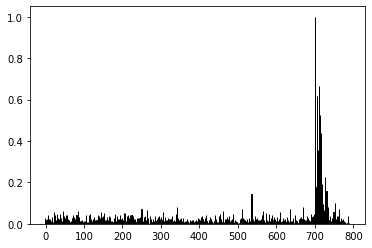

In [447]:
X_indices = np.arange(X.shape[-1])

# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=TOP)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')


In [448]:
zip_Score_Feat = []
for i in range(len(scores)):
    temp = (scores[i], maleTrain['feature_names'][i])
    zip_Score_Feat.append(temp)
    
#print (zip_Score_Feat)
zip_Score_Feat.sort(reverse = True)
zip_Score_Feat    

In [449]:
#print (zip_Score_Feat)
zip_Score_Feat.sort()
zip_Score_Feat

[(2.3780904265279422e-05, 'sw_62'),
 (3.5190441812374134e-05, 'question'),
 (4.046713745672567e-05, 'kw_211'),
 (5.981203602441253e-05, 'kw_269'),
 (6.793414046669367e-05, 'kw_527'),
 (7.33748999046183e-05, 'kw_226'),
 (8.208287137618568e-05, 'kw_195'),
 (0.00011781242897206363, 'kw_577'),
 (0.00016389744111324373, 'kw_467'),
 (0.00019656145601326563, 'kw_183'),
 (0.00020017157948907285, 'kw_65'),
 (0.0002989092248181858, 'kw_334'),
 (0.00037072477150764353, 'kw_128'),
 (0.0004262677466764403, 'kw_367'),
 (0.00044145484814790936, 'kw_580'),
 (0.00044419784653525836, 'kw_502'),
 (0.0004460420326125907, 'creatT_2'),
 (0.0004732775356432428, 'kw_531'),
 (0.0004732827322003688, 'kw_380'),
 (0.0004915425401019322, 'sw_66'),
 (0.0005379828384976057, 'colon'),
 (0.0005513719010804048, 'kw_25'),
 (0.0005981000976440697, 'kw_484'),
 (0.0006031155835828035, 'kw_327'),
 (0.0006033757356096518, 'kw_480'),
 (0.0006121947410831403, 'kw_604'),
 (0.0006304975949043262, 'kw_437'),
 (0.00063300476942421

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification accuracy without selecting features: 0.442
Classification accuracy after univariate feature selection: 0.561


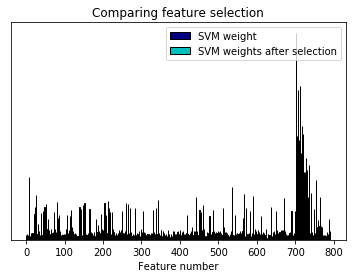

In [450]:
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=TOP), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [ ]:
100: 471, 552
200: 479, 511
500: 471, 496